<b> Principal Components Analysis </b>
<table style="width:50%">
<tr>
    <th>Mouse</th>    
    <th>Gene 1</th>
    <th>Gene 2</th>
    <th>Gene 3</th>
    <th>Gene 4</th>
</tr>
<tr>
    <th>1</th>
    <th>10</th>
    <th>6</th>
    <th>1.2</th>
    <th>5</th>
</tr>
<tr>
    <th>2</th>
    <th>11</th>
    <th>4</th>
    <th>9</th>
    <th>7</th>
</tr>
<tr>
    <th>3</th>
    <th>8</th>
    <th>5</th>
    <th>10</th>
    <th>6</th>
</tr>
<tr>
    <th>4</th>
    <th>3</th>
    <th>3</th>
    <th>2.5</th>
    <th>2</th>
</tr>
<tr>
    <th>5</th>
    <th>1</th>
    <th>2.8</th>
    <th>1.3</th>
    <th>4</th>
</tr>
<tr>
    <th>6</th>
    <th>2</th>
    <th>1</th>
    <th>2</th>
    <th>7</th>
</tr>
</table>

If we only measure Gene 1 how can I separate the mice? We can plot on a line

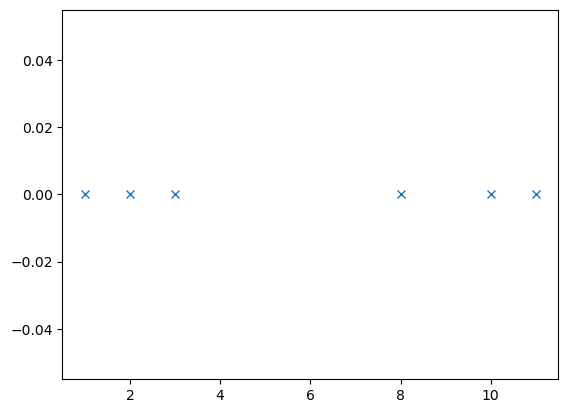

In [2]:
import numpy as np
from matplotlib import pyplot as plt
gene1 = [10, 11, 8, 3, 1 ,2]
val=0
plt.plot(gene1, np.zeros_like(gene1) + val, 'x')

Mice 1, 2 and 3 are more similar to each other than they are to mice 4, 5 and 6. If we measure 2 genes we can do a 2D plot of this.

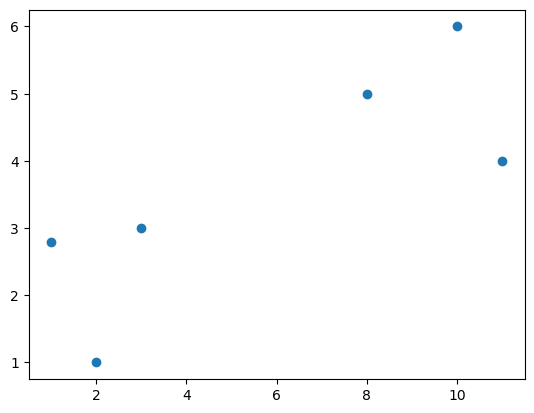

In [3]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)

<ul>
    <li> PCA can tell us which gene or variable is the most valuable for clustering data</li>
    <li> For example, PCA could tell is that Gene3 is responsible for separating samples along the x-axis</li>
    </ul>
    

To understand PCA we will consider the dataset with two genes.

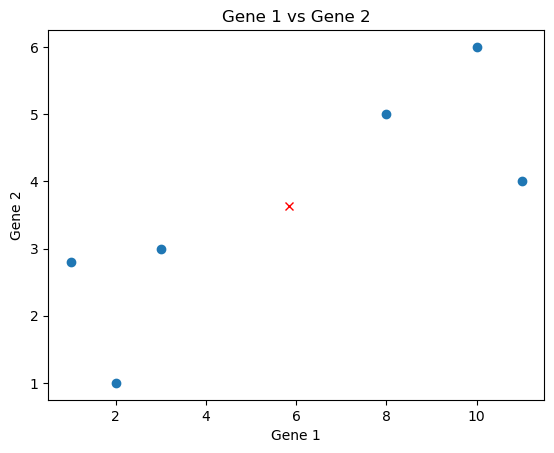

In [4]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')


<ul>
    <li> Next calculate the average measurement for Gene 1 and the average measurement for Gene 2.</li>
    <li> With the average values we can calculate the centre of the data </li>
    <li> From this point, we will focus on what happens in the graph, we no longer need the original data </li>
    <li> We will shift the data so that the centre is at the origin</li>
    </ul>


In [5]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


Text(0, 0.5, 'Gene 2')

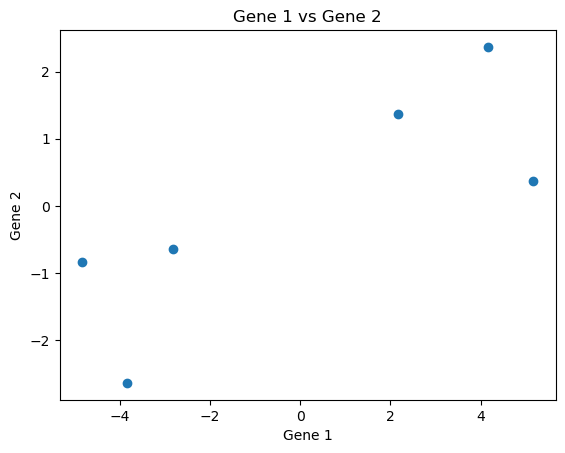

In [6]:
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")

<ul>
    <li> Shifting the data did not change how the data points are positioned relative to each other</li>
    <li> Now that the data is centred at the origin we can try to fit a line to it</li>
    <li> Start with a random line through the origin and rotate until it fits as good as possible </li>
    <li> We need to talk about how PCA decides if a fit is good or not</li>
    <li> Consider the starting random line through the original </li>
    <li> To quantify how good this line fits the data, PCA project the data onto it and then it can either measure the distances from the data to the line and try to find the line that minimises distances or </li>
    <li> It can try to find the line that maximises the distances from the projected points to the origin</li>
    <li> $a^2 = b^2 + c^2$ since $a$ is fixed as $b$ gets bigger $c$ must get smaller and vice versa</li>
    <li> PCA can either minimise $b$ or maximise $c$ </li>
    <li> Intuitively it is more obvious to minimise $b$... but it is actually easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the sum of the squared distances from the projected points to the origin </li>
    <li> Rotate the line to find largest SS(distances) </li>
    <li> This line is called Principal Component 1 or PC1 for short </li>
<ul>
    

In [8]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(gene1, gene2)
print(slope)

0.32302284710017576


In [9]:
print(intercept)

-1.6964884226316686e-16


<ul>
    <li>PC1 has a slope 0.323. In other words for every 3 units that we go along the gene1 axis we go up 1 unit along the gene2 axis</li>
    <li>That means that the data is mostly spread out along the gene1 axis and only a little spread out along the gene2 axis</li>
    <li>To make PC1 we take 3 parts gene1 and 1 part gene2 </li>
    <li> The ration of gene1 to gene2 tells you tat gene1 is more important when it comes to describing how spread out the data is</li>
    <li> PC1 is a linear combination of gene1 and gene2 </li>
    <li> When you do PCA with Singular Value Decompostition (SVD), the recipe for PC1 is scaled so tat its length is 1 in our case we need by $sqrt(10)$</li>
    <li> $PC1 = \frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$</li>
    <li> The unit vector is called the Singular Vector or the eigenvector of PC1 </li>
    <li> The proportions of each gene are called "Loading Scores"</li>
    <li> PCA calls the average of the SS(distances) for the best fit line the eigenvalue for PC1</li>
    <li>$\frac{SS(distances for PC1)}{n-1} = Eigenvalue for PC1$ </li>
    <li>$\sqrt(SS(distances for PC1) = Singular value for PC1$</li>
    <li>Because this example is 2D, PC2 is simply the line through the origin that is perpendicular to PC1</li>
    <li>$PC2 = -1gene1 + 3gene2$</li>
    <li>Scaling to unit vector $PC2 = \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt(10)}gene2$</li>
    <li> For PC2 gene2 is 3 times as important as gene1</li>
    </ul>

<ul>
    <li> To draw the final PCA plot rotate everything so that PC1 is horizontal. Then we can use the projected points to see where the sample points are in the pca plot</li>
    <li> Eigenvalues are measures of variation </li>
    <li> For the sake of this example imagine that the variation for PC1 is 15 and the variation for PC2 = 3</li>
    <li> Total variation is 15+3 = 18</li>
    <li> This means that PC1 accounts for 15/18=83% of the total variation around the PCs </li>
    <li> A scree plot is a graphical representation of the percentages of variation that PC accounts for </li>
    </ul>

<b> PCA with 3 variables </b>
<ul>
    <li> Centre the data </li>
    <li> Find the line of best fit that goes through the origin - PC1</li>
    <li> $PC1 = 0.62gene1+0.15gene2+0.77gene3$ </li>
    <li> PC2 is the next best fitting line that goes through the origin and is at right angles to PC1</li>
    <li> $PC2 = 0.77gene1 + 0.62gene2+0.15gene3$</li>
    <li>PC3 is the best fitting line through the origin that is orthogonal to PC1 and PC2</li>
    <li> In theory there is one PC per gene (or variable) but in practice, the number of PCs is either te number of variables or the number of samples, whichever is smaller</li>
    <li> Once we have all of the PCs we can use the eigenvalues to determine the proportion of variation that PC accounts for for</li>
    <li> Suppose PC1 accounts for 79%, PC2 for 15%, and PC3 for 6%</li>
    </ul>

In [10]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
genes = ['gene'+str(i) for i in range(1, 101)]
wt = ['wt'+str(i) for i in range(1, 6)]
ko = ['ko'+str(i) for i in range(1, 6)]

In [16]:
data = pd.DataFrame(columns=[*wt, *ko], index = genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [20]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5   ko1   ko2  ko3   ko4  ko5
gene1  472  449  516  443  448    83    89   90    76   96
gene2   14   13   11   10   13  1024  1035  982  1011  932
gene3  333  322  306  339  309   459   482  532   483  529
gene4  407  415  351  387  462   852   909  911   878  873
gene5  594  595  616  549  613   164   167  161   179  178


In [21]:
print(data.shape)

(100, 10)


In [23]:
scaled_data = preprocessing.scale(data.T)

In [25]:
print(scaled_data)

[[ 1.02820536 -0.99494282 -0.84531481 -0.98143471  0.99934143 -0.82358045
  -1.37852076 -0.56201128 -1.04258774  0.90577404  0.40128691 -1.2769785
  -1.08302831  1.1866322  -1.10381405 -1.08884398 -1.07635844 -1.25388168
  -0.86929381 -1.01491056  0.95468316  0.49208967 -0.60316995 -0.86403799
  -0.83703708 -1.01331212  0.87418271  1.01828024  0.93369454  1.08350379
  -0.99264503  0.72076191 -1.35498782 -0.94063297 -1.07590168  1.25261913
   0.22513119 -1.19676464  0.91183364 -0.95538319  0.92640714 -1.00235552
   0.38856502 -0.99284232  0.84718339 -0.99884988  1.05729277  0.90825057
   0.88410267 -0.74092435  1.19287076  1.12155233 -0.91464503 -0.95479479
  -0.99572743 -0.36954103  0.98645697  1.14683612  0.79847442 -1.20732027
   0.98993711  1.2121875   0.42295644  1.06817211  0.92836182 -1.23303789
   0.97658739 -0.70743576 -0.9921221  -0.99377666 -0.94269993  0.45464294
   1.18225795  1.64870666 -0.96906158 -1.07509859 -0.88657176 -0.91510189
   0.82828341  1.35614539 -0.86325198  

In [29]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var
pca_data


array([[-9.22911153e+00,  1.53585569e+00, -1.07793694e+00,
         1.47156097e-01,  2.28329425e+00, -1.13622839e+00,
        -1.31375477e-01, -4.57157443e-01, -2.98164766e-01,
        -3.38618023e-15],
       [-9.51986627e+00, -1.78975271e+00, -1.59407388e+00,
        -3.80430656e-01, -1.98905596e-01,  8.09230237e-01,
        -2.44714773e-01, -7.73401428e-01,  1.18793372e+00,
         1.66533454e-16],
       [-9.33539955e+00,  1.11501220e+00,  1.57231352e+00,
         1.91447597e+00, -1.78015142e+00, -4.23062120e-01,
         2.01729104e-01, -7.91052334e-01, -2.13784808e-01,
        -6.21724894e-15],
       [-9.55833081e+00, -1.83459291e+00, -3.80371551e-01,
        -2.95092948e-01,  3.30848280e-02,  5.72869536e-01,
         1.46795105e+00,  7.63127141e-01, -8.63791237e-01,
        -1.11022302e-16],
       [-9.74799059e+00,  8.85821655e-01,  1.46112017e+00,
        -1.35325975e+00, -3.36489269e-01,  6.92209565e-02,
        -1.29183452e+00,  1.23509090e+00,  1.83981915e-01,
        -5.

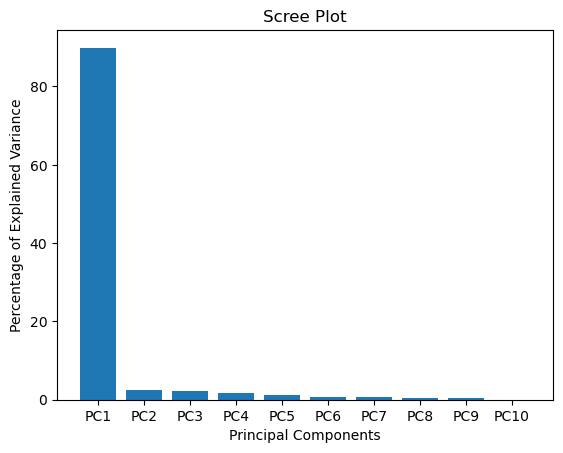

In [28]:
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()

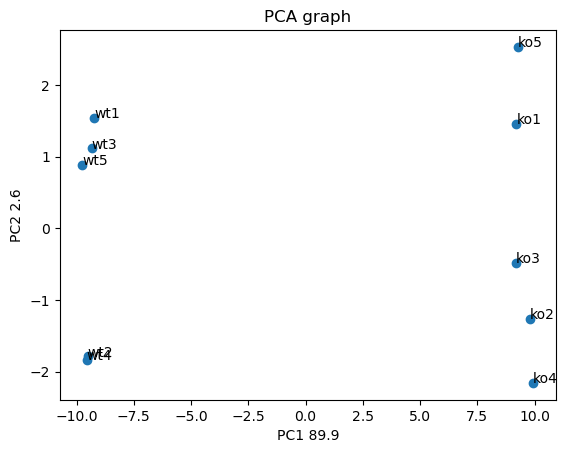

In [30]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [33]:
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1     -0.104797
gene2      0.105343
gene3      0.101996
gene4      0.104540
gene5     -0.105019
             ...   
gene96     0.069048
gene97    -0.105239
gene98     0.104806
gene99    -0.104005
gene100    0.103583
Length: 100, dtype: float64

In [34]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
top_10_genes

array(['gene44', 'gene29', 'gene31', 'gene46', 'gene83', 'gene75',
       'gene2', 'gene70', 'gene94', 'gene42'], dtype=object)

<b> PCA on MNIST </b>
<ul>
    <li> MNIST data has redundant pixels. Getting ride of redundant pixels will </li>
    <li> Faster training training and inference</li>
    <li> Data visualization easier </li>
    <li> PCA is a process of figuring out the most important features that have the most impact on the target variable </li>
    <li> Scale features before applying PCA </li>
    <li> Accuracy might drop </li>
    </ul>
    
    

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
dataset.data.shape

(1797, 64)

In [4]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

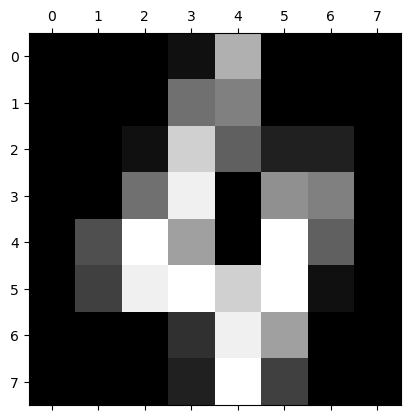

In [10]:
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(dataset.data[4].reshape(8,8))


In [11]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
dataset.target[0]

0

In [14]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [17]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [19]:
X = df
y = dataset.target

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [41]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 54)

In [30]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.12875948,
        -0.10836118,  0.01791386],
       [ 0.58898033,  0.9246358 ,  3.92475494, ..., -0.06281057,
        -0.04847131,  0.39530474],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.00678432,
        -0.08145492,  0.31096665],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ..., -0.3719933 ,
         0.60645363, -0.2940029 ],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.03681226,
         0.2276726 ,  0.37771634],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38985211,
         0.1880376 , -0.08888721]])

In [32]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163,
       0.00406053, 0.00397085, 0.00356493, 0.00340787, 0.00327835,
       0.00311032, 0.00288575, 0.00276489, 0.00259175, 0.00234483,
       0.00218257, 0.00203598, 0.00195512, 0.00183318])

In [36]:
pca.n_components_

54

In [37]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [39]:
pca.explained_variance_ratio

array([0.12033916, 0.09561054])